In [1]:
import pandas as pd
import numpy as np
import re
import warnings
# Sample string
warnings.filterwarnings("ignore")

In [65]:
df = pd.read_csv("/home/hpc/HPC_BOOST/convertfib_merge_35_benign_new.csv")
df2 = pd.read_csv("/home/hpc/HPC_BOOST/convertfib_38_malicious_new.csv")
df3 = pd.read_csv("/home/hpc/HPC_BOOST/convertfib_merge_35_malicious_new.csv")



In [66]:
def make_df_core(temp):
    l=list(temp.columns)
    for i in range(4,len(list(temp.columns))):
        var1=l[i]+"_1"
        var2=l[i]+"_2"
        var3=l[i]+"_3"
        var4=l[i]+"_4"
        temp1 = temp[l[i]].str.split("'",expand=True)[1]
        temp2 = temp[l[i]].str.split("'",expand=True)[3]
        temp3 = temp[l[i]].str.split("'",expand=True)[5]
        temp4 = temp[l[i]].str.split("'",expand=True)[7]
        temp_ = pd.concat([temp1, temp2,temp3,temp4], axis=1)
        temp[[var1,var2,var3,var4]] = temp_
        temp.drop(columns=[l[i]], inplace=True)
    
    l=list(temp.columns)
    for i in range(len(l)):
        temp[l[i]] = temp[l[i]].astype(float)
    print(temp.dtypes)
    return temp
# l2=list(temp2.columns)
# for i in range(4,len(list(temp2.columns))):
#     var1=l2[i]+"_1"
#     var2=l2[i]+"_2"
#     var3=l2[i]+"_3"
#     var4=l2[i]+"_4"
#     temp2[[var1,var2,var3,var4]] = temp2[l2[i]].str.split(",",expand=True)
#     temp2.drop(columns=[l2[i]], inplace=True)

In [67]:
df = make_df_core(df)
df2 = make_df_core(df2)
df3 = make_df_core(df3)

Unnamed: 0                          float64
EventCount                          float64
CpuCount                            float64
Total runtime [s]                   float64
TEMP_CORE_1                         float64
                                     ...   
FRONTEND_RETIRED_LATENCY_GE_32_4    float64
FRONTEND_RETIRED_LATENCY_GE_64_1    float64
FRONTEND_RETIRED_LATENCY_GE_64_2    float64
FRONTEND_RETIRED_LATENCY_GE_64_3    float64
FRONTEND_RETIRED_LATENCY_GE_64_4    float64
Length: 1632, dtype: object
Unnamed: 0                          float64
EventCount                          float64
CpuCount                            float64
Total runtime [s]                   float64
TEMP_CORE_1                         float64
                                     ...   
FRONTEND_RETIRED_LATENCY_GE_32_4    float64
FRONTEND_RETIRED_LATENCY_GE_64_1    float64
FRONTEND_RETIRED_LATENCY_GE_64_2    float64
FRONTEND_RETIRED_LATENCY_GE_64_3    float64
FRONTEND_RETIRED_LATENCY_GE_64_4    float64
Leng

In [68]:
index_col = df['Total runtime [s]']

In [69]:
df.set_index("Total runtime [s]",inplace=True )
df2.set_index("Total runtime [s]",inplace=True )
df3.set_index("Total runtime [s]",inplace=True )

In [58]:
df.head()

,Unnamed: 0,EventCount,CpuCount,TEMP_CORE_1,TEMP_CORE_2,TEMP_CORE_3,TEMP_CORE_4,PWR_PKG_ENERGY_1,PWR_PKG_ENERGY_2,PWR_PKG_ENERGY_3,...,FRONTEND_RETIRED_LATENCY_GE_16_3,FRONTEND_RETIRED_LATENCY_GE_16_4,FRONTEND_RETIRED_LATENCY_GE_32_1,FRONTEND_RETIRED_LATENCY_GE_32_2,FRONTEND_RETIRED_LATENCY_GE_32_3,FRONTEND_RETIRED_LATENCY_GE_32_4,FRONTEND_RETIRED_LATENCY_GE_64_1,FRONTEND_RETIRED_LATENCY_GE_64_2,FRONTEND_RETIRED_LATENCY_GE_64_3,FRONTEND_RETIRED_LATENCY_GE_64_4
Total runtime [s],,,,,,,,,,,,,,,,,,,,,
0.000022,0.0,31.0,4.0,41.0,43.0,44.0,42.0,0.014587,0.0,0.0,...,24.0,53.0,9.0,0.0,24.0,53.0,9.0,0.0,24.0,53.0
0.010028,1.0,31.0,4.0,42.0,40.0,43.0,39.0,0.083069,0.0,0.0,...,112.0,191.0,544.0,58.0,112.0,191.0,544.0,58.0,112.0,191.0
0.020071,2.0,31.0,4.0,42.0,50.0,43.0,50.0,0.110901,0.0,0.0,...,363.0,144.0,684.0,59.0,363.0,144.0,684.0,59.0,363.0,144.0
0.030077,3.0,31.0,4.0,42.0,52.0,43.0,52.0,0.126587,0.0,0.0,...,83.0,162.0,663.0,258.0,83.0,162.0,663.0,258.0,83.0,162.0
0.040124,4.0,31.0,4.0,42.0,53.0,43.0,54.0,0.126099,0.0,0.0,...,89.0,152.0,661.0,88.0,89.0,152.0,661.0,88.0,89.0,152.0


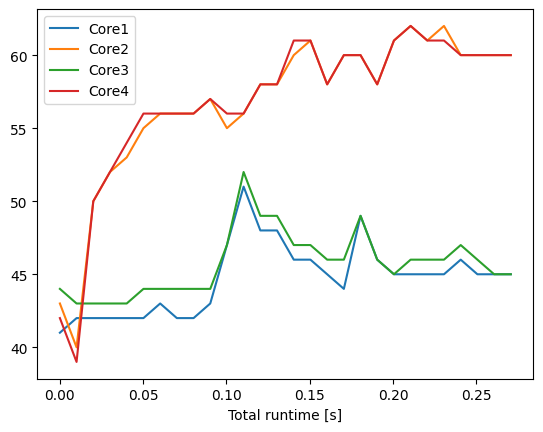

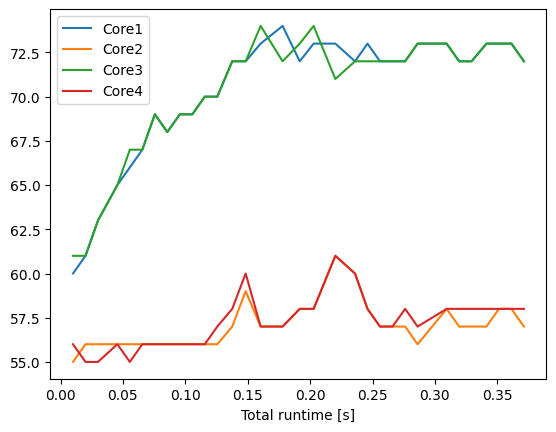

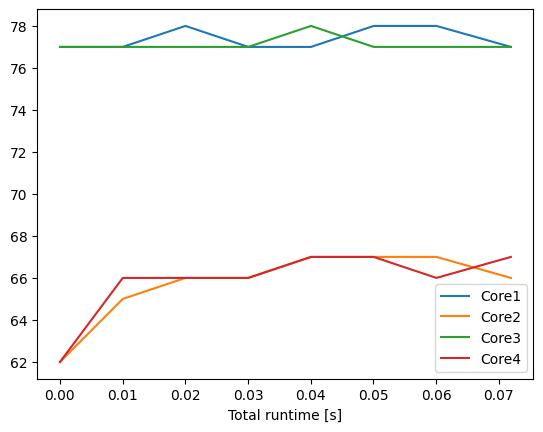

In [70]:
import matplotlib.pyplot as plt

# y=df['TEMP_CORE_1']
# x=df['Total runtime [s]']
df.TEMP_CORE_1.plot(label="Core1")
df.TEMP_CORE_2.plot(label="Core2")
df.TEMP_CORE_3.plot(label="Core3")
df.TEMP_CORE_4.plot(label="Core4")
# plt.plot(x,y)
plt.legend()
plt.show()

df2.TEMP_CORE_1.plot(label="Core1")
df2.TEMP_CORE_2.plot(label="Core2")
df2.TEMP_CORE_3.plot(label="Core3")
df2.TEMP_CORE_4.plot(label="Core4")
# plt.plot(x,y)
plt.legend()
plt.show()


df3.TEMP_CORE_1.plot(label="Core1")
df3.TEMP_CORE_2.plot(label="Core2")
df3.TEMP_CORE_3.plot(label="Core3")
df3.TEMP_CORE_4.plot(label="Core4")
# plt.plot(x,y)
plt.legend()
plt.show()

<Axes: xlabel='Total runtime [s]'>

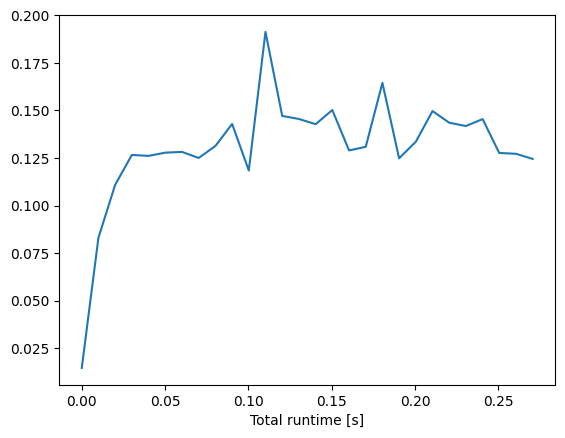

In [71]:
df.PWR_PKG_ENERGY_1.plot()

In [72]:
vector = df.values.flatten()
vector2 = df2.values.flatten()
vector3 = df3.values.flatten()

In [73]:
len(vector),len(df.columns),len(vector2),len(df2.columns),len(vector3),len(df3.columns)

(45668, 1631, 52192, 1631, 13048, 1631)

In [74]:
len(vector)/(1631*3),len(vector2)/(1631*3) , len(vector3)/(1631*3) , 

(9.333333333333334, 10.666666666666666, 2.6666666666666665)

In [63]:
len(vector)/(1631*3)

9.333333333333334

In [77]:
x_data=[]
y_data=[]
for i in range(0,8):
    # print(i*5*108 , (i+1)*108*5)
    x_data.append(vector[i*3*1631:(i+1)*1631*3])
    y_data.append(0)

In [78]:
for i in range(0,9):
    # print(i*5*108 , (i+1)*108*5)
    x_data.append(vector2[i*3*1631:(i+1)*1631*3])
    y_data.append(1)

In [79]:
for i in range(0,1):
    # print(i*5*108 , (i+1)*108*5)
    x_data.append(vector3[i*3*1631:(i+1)*1631*3])
    y_data.append(1)

In [80]:
for i in range(len(x_data)):
     print(len(x_data[i]),i)

4893 0
4893 1
4893 2
4893 3
4893 4
4893 5
4893 6
4893 7
4893 8
4893 9
4893 10
4893 11
4893 12
4893 13
4893 14
4893 15
4893 16
4893 17


In [81]:
x_data = np.array(x_data)

In [82]:
x_data.shape

(18, 4893)

In [349]:
for i in range(1000):
    noise = 0.1 * np.random.randn(8155)
    # print(x_data[i].shape,noise.shape,x_data[i],i)
    lambda_val = 28  # Adjust this parameter based on your data
    noise2 = np.random.poisson(lambda_val, size=x_data[i].shape)
    scale = 8000 # Adjust this parameter based on your data
    noise3 = np.random.laplace(0, scale, size=x_data[i].shape)

    noise_uniform = np.random.uniform(-50, 50, size=x_data[i].shape)

    noisy_arr = x_data[i] + noise + noise2 + noise3+noise_uniform
    x_data.append(noisy_arr)
    y_data.append(1)

In [83]:
two_d_array = np.vstack(x_data)
print(two_d_array)


[[0.000e+00 3.100e+01 4.000e+00 ... 5.900e+01 3.630e+02 1.440e+02]
 [3.000e+00 3.100e+01 4.000e+00 ... 4.800e+01 3.060e+02 2.230e+02]
 [6.000e+00 3.100e+01 4.000e+00 ... 5.450e+02 3.290e+02 4.550e+02]
 ...
 [2.100e+01 3.100e+01 4.000e+00 ... 1.197e+03 5.500e+01 2.500e+02]
 [2.400e+01 3.100e+01 4.000e+00 ... 4.480e+02 3.700e+02 4.140e+02]
 [0.000e+00 3.100e+01 4.000e+00 ... 6.008e+03 3.123e+03 8.260e+02]]


In [84]:
x_data=np.array(two_d_array)

In [85]:
y_data = np.array(y_data)

In [86]:
x_data.shape

(18, 4893)

In [87]:
x_data[0]

array([  0.,  31.,   4., ...,  59., 363., 144.])

In [ ]:
arr = np.random.rand(5, 5)
# Add Gaussian (normal) noise with mean 0 and standard deviation 0.1
noise = 0.1 * np.random.randn(5, 5)
noisy_arr = arr + noise

In [125]:
len(x_data[0])

8155

In [90]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 1.7 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 2.1 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 KB 1.4 MB/s eta 0:00:00a 0:00:01


In [91]:
from sklearn.model_selection import train_test_split

x_data = np.asarray(x_data).astype('float32')
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=2)


In [96]:
len(X_train)

12

In [205]:
!pip install sentence_transformers


  Using cached simpletransformers-0.64.3-py3-none-any.whl (250 kB)
  Using cached wandb-0.16.0-py3-none-any.whl (2.1 MB)
  Using cached streamlit-1.28.2-py2.py3-none-any.whl (8.4 MB)
  Using cached transformers-4.35.2-py3-none-any.whl (7.9 MB)
  Using cached seqeval-1.2.2-py3-none-any.whl
  Using cached tokenizers-0.15.0-cp39-none-win_amd64.whl (2.2 MB)
  Using cached huggingface_hub-0.19.4-py3-none-any.whl (311 kB)
  Using cached GitPython-3.1.40-py3-none-any.whl (190 kB)
  Using cached docker_pycreds-0.4.0-py2.py3-none-any.whl (9.0 kB)
  Using cached rich-13.7.0-py3-none-any.whl (240 kB)
  Using cached tzlocal-5.2-py3-none-any.whl (17 kB)
  Using cached blinker-1.7.0-py3-none-any.whl (13 kB)
  Using cached pydeck-0.8.1b0-py2.py3-none-any.whl (4.8 MB)
  Using cached altair-5.1.2-py3-none-any.whl (516 kB)
  Using cached tensorboard-2.15.1-py3-none-any.whl (5.5 MB)
  Using cached grpcio-1.59.3-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached google_auth_oauthlib-1.1.0-py2.py3-none-any.wh

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.23.4 which is incompatible.
tensorflow 2.9.1 requires tensorboard<2.10,>=2.9, but you have tensorboard 2.15.1 which is incompatible.


     ---------------------------------------- 86.0/86.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 192.2/192.2 MB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 9.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 13.8 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 13.1 MB/s eta 0:00:00
     ---------------------------------------- 5.7/5.7 MB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 11.1 MB/s eta 0:00:00
     ------------------------------------- 536.2/536.2 kB 17.0 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=7bbd24a07ca0f277235928b004a3411677604df4f857e13e27ee0ba5444767dc
  Stored in directory: c:\users\aaditya gupta\appdata\local\pip\cache\wheels\71\67\0

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Aaditya Gupta\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\~il\\_imaging.cp39-win_amd64.pyd'
Check the permissions.



In [207]:
!pip install torchvision 



  Using cached torchvision-0.16.1-cp39-cp39-win_amd64.whl (1.1 MB)
  Using cached torch-2.1.1-cp39-cp39-win_amd64.whl (192.2 MB)
  Using cached networkx-3.2.1-py3-none-any.whl (1.6 MB)

[notice] A new release of pip available: 22.2 -> 23.3.1
[notice] To update, run: C:\Users\Aaditya Gupta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [212]:
X_train.shape

(3611, 108)

In [97]:
c=0
d=0
for i in y_test:
    if i==1:
        c+=1
    else:
        d+=1
print(c,d)

3 3


In [98]:
X_train[0]

array([  9.,  31.,   4., ..., 470., 863., 493.], dtype=float32)

In [99]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((12, 4893), (12,), (6, 4893), (6,))

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

rf_classifier = DecisionTreeClassifier()

# Fit the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
predictions = rf_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test,predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [101]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=151)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
predictions = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, predictions)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



In [138]:
clf = LogisticRegression(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
predictions = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, predictions)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        68

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124



In [102]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [103]:
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.022 seconds


In [104]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance
clf = RandomForestClassifier()

# Fit the model
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_


In [105]:
feature_importances

array([0., 0., 0., ..., 0., 0., 0.])

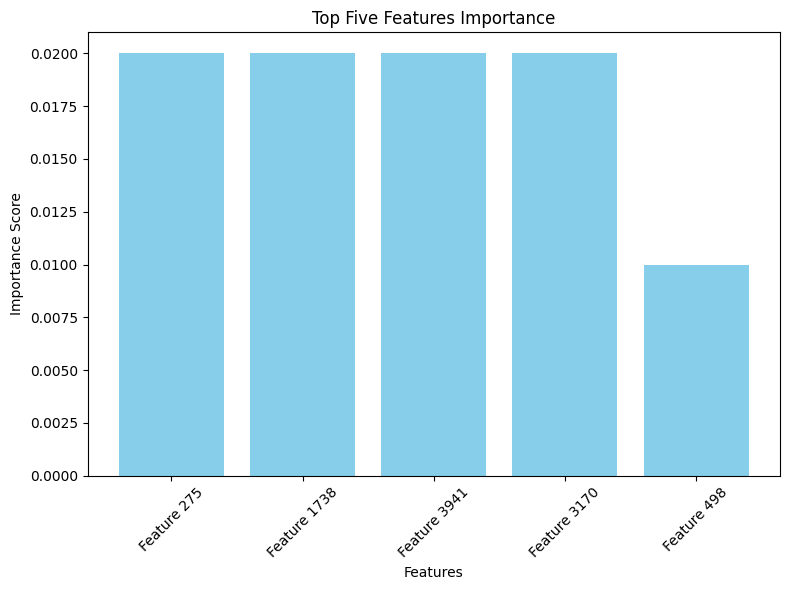

In [106]:
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top five features and their scores
top_five_indices = sorted_indices[:5]
top_five_features = [f"Feature {i+1}" for i in top_five_indices]
top_five_scores = feature_importances[top_five_indices]

# Plotting the top five features
plt.figure(figsize=(8, 6))
plt.bar(top_five_features, top_five_scores, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Top Five Features Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [107]:
df.columns

Index(['Unnamed: 0', 'EventCount', 'CpuCount', 'TEMP_CORE_1', 'TEMP_CORE_2',
       'TEMP_CORE_3', 'TEMP_CORE_4', 'PWR_PKG_ENERGY_1', 'PWR_PKG_ENERGY_2',
       'PWR_PKG_ENERGY_3',
       ...
       'FRONTEND_RETIRED_LATENCY_GE_16_3', 'FRONTEND_RETIRED_LATENCY_GE_16_4',
       'FRONTEND_RETIRED_LATENCY_GE_32_1', 'FRONTEND_RETIRED_LATENCY_GE_32_2',
       'FRONTEND_RETIRED_LATENCY_GE_32_3', 'FRONTEND_RETIRED_LATENCY_GE_32_4',
       'FRONTEND_RETIRED_LATENCY_GE_64_1', 'FRONTEND_RETIRED_LATENCY_GE_64_2',
       'FRONTEND_RETIRED_LATENCY_GE_64_3', 'FRONTEND_RETIRED_LATENCY_GE_64_4'],
      dtype='object', length=1631)

In [108]:
label = np.zeros(len(df))

In [109]:
label1 = np.ones(len(df2))

In [110]:
label2 = np.ones(len(df3))

In [111]:
df['label'] = label

In [112]:
df2['label'] = label1

In [113]:
df3['label'] = label2

In [114]:
df_all = pd.concat([df,df2,df3],axis=0)

In [162]:
df2.columns,df.columns

(Index(['Unnamed: 0', 'EventCount', 'CpuCount', 'TEMP_CORE_1', 'TEMP_CORE_2',
        'TEMP_CORE_3', 'TEMP_CORE_4', 'PWR_PKG_ENERGY_1', 'PWR_PKG_ENERGY_2',
        'PWR_PKG_ENERGY_3',
        ...
        'FRONTEND_RETIRED_LATENCY_GE_16_4', 'FRONTEND_RETIRED_LATENCY_GE_32_1',
        'FRONTEND_RETIRED_LATENCY_GE_32_2', 'FRONTEND_RETIRED_LATENCY_GE_32_3',
        'FRONTEND_RETIRED_LATENCY_GE_32_4', 'FRONTEND_RETIRED_LATENCY_GE_64_1',
        'FRONTEND_RETIRED_LATENCY_GE_64_2', 'FRONTEND_RETIRED_LATENCY_GE_64_3',
        'FRONTEND_RETIRED_LATENCY_GE_64_4', 'label'],
       dtype='object', length=1632),
 Index(['Unnamed: 0', 'EventCount', 'CpuCount', 'TEMP_CORE_1', 'TEMP_CORE_2',
        'TEMP_CORE_3', 'TEMP_CORE_4', 'PWR_PKG_ENERGY_1', 'PWR_PKG_ENERGY_2',
        'PWR_PKG_ENERGY_3',
        ...
        'FRONTEND_RETIRED_LATENCY_GE_16_4', 'FRONTEND_RETIRED_LATENCY_GE_32_1',
        'FRONTEND_RETIRED_LATENCY_GE_32_2', 'FRONTEND_RETIRED_LATENCY_GE_32_3',
        'FRONTEND_RETIRED_LATENCY_GE_

In [165]:
df_all

,Unnamed: 0,EventCount,CpuCount,TEMP_CORE_1,TEMP_CORE_2,TEMP_CORE_3,TEMP_CORE_4,PWR_PKG_ENERGY_1,PWR_PKG_ENERGY_2,PWR_PKG_ENERGY_3,...,FRONTEND_RETIRED_LATENCY_GE_16_4,FRONTEND_RETIRED_LATENCY_GE_32_1,FRONTEND_RETIRED_LATENCY_GE_32_2,FRONTEND_RETIRED_LATENCY_GE_32_3,FRONTEND_RETIRED_LATENCY_GE_32_4,FRONTEND_RETIRED_LATENCY_GE_64_1,FRONTEND_RETIRED_LATENCY_GE_64_2,FRONTEND_RETIRED_LATENCY_GE_64_3,FRONTEND_RETIRED_LATENCY_GE_64_4,label
Total runtime [s],,,,,,,,,,,,,,,,,,,,,
0.000025,0.0,31.0,4.0,41.0,39.0,41.0,41.0,0.056030,0.0,0.0,...,67.0,367.0,790.0,283.0,67.0,367.0,790.0,283.0,67.0,0.0
0.009996,1.0,31.0,4.0,40.0,38.0,41.0,39.0,0.072388,0.0,0.0,...,342.0,327.0,1273.0,423.0,342.0,327.0,1273.0,423.0,342.0,0.0
0.020073,2.0,31.0,4.0,40.0,38.0,39.0,38.0,0.065491,0.0,0.0,...,255.0,89.0,947.0,810.0,255.0,89.0,947.0,810.0,255.0,0.0
0.030574,3.0,31.0,4.0,39.0,37.0,38.0,37.0,0.025330,0.0,0.0,...,146.0,310.0,258.0,372.0,146.0,310.0,258.0,372.0,146.0,0.0
0.050468,4.0,31.0,4.0,38.0,37.0,38.0,37.0,0.054382,0.0,0.0,...,240.0,375.0,41.0,1237.0,240.0,375.0,41.0,1237.0,240.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11.654987,1045.0,31.0,4.0,73.0,67.0,73.0,68.0,0.284180,0.0,0.0,...,686.0,103.0,239.0,792.0,686.0,103.0,239.0,792.0,686.0,1.0
11.664995,1046.0,31.0,4.0,72.0,66.0,72.0,67.0,0.181519,0.0,0.0,...,793.0,58.0,122.0,768.0,793.0,58.0,122.0,768.0,793.0,1.0
11.675002,1047.0,31.0,4.0,73.0,67.0,72.0,67.0,0.177917,0.0,0.0,...,841.0,280.0,65.0,69.0,841.0,280.0,65.0,69.0,841.0,1.0


In [115]:
x = df_all.drop(['label'],axis=1)

In [116]:
y = df_all['label']

In [117]:
clf = DecisionTreeClassifier(random_state=151)
clf.fit(x, y)

DecisionTreeClassifier(random_state=151)

In [170]:
df_all.columns

Index(['Unnamed: 0', 'EventCount', 'CpuCount', 'TEMP_CORE_1', 'TEMP_CORE_2',
       'TEMP_CORE_3', 'TEMP_CORE_4', 'PWR_PKG_ENERGY_1', 'PWR_PKG_ENERGY_2',
       'PWR_PKG_ENERGY_3',
       ...
       'FRONTEND_RETIRED_LATENCY_GE_16_4', 'FRONTEND_RETIRED_LATENCY_GE_32_1',
       'FRONTEND_RETIRED_LATENCY_GE_32_2', 'FRONTEND_RETIRED_LATENCY_GE_32_3',
       'FRONTEND_RETIRED_LATENCY_GE_32_4', 'FRONTEND_RETIRED_LATENCY_GE_64_1',
       'FRONTEND_RETIRED_LATENCY_GE_64_2', 'FRONTEND_RETIRED_LATENCY_GE_64_3',
       'FRONTEND_RETIRED_LATENCY_GE_64_4', 'label'],
      dtype='object', length=1632)

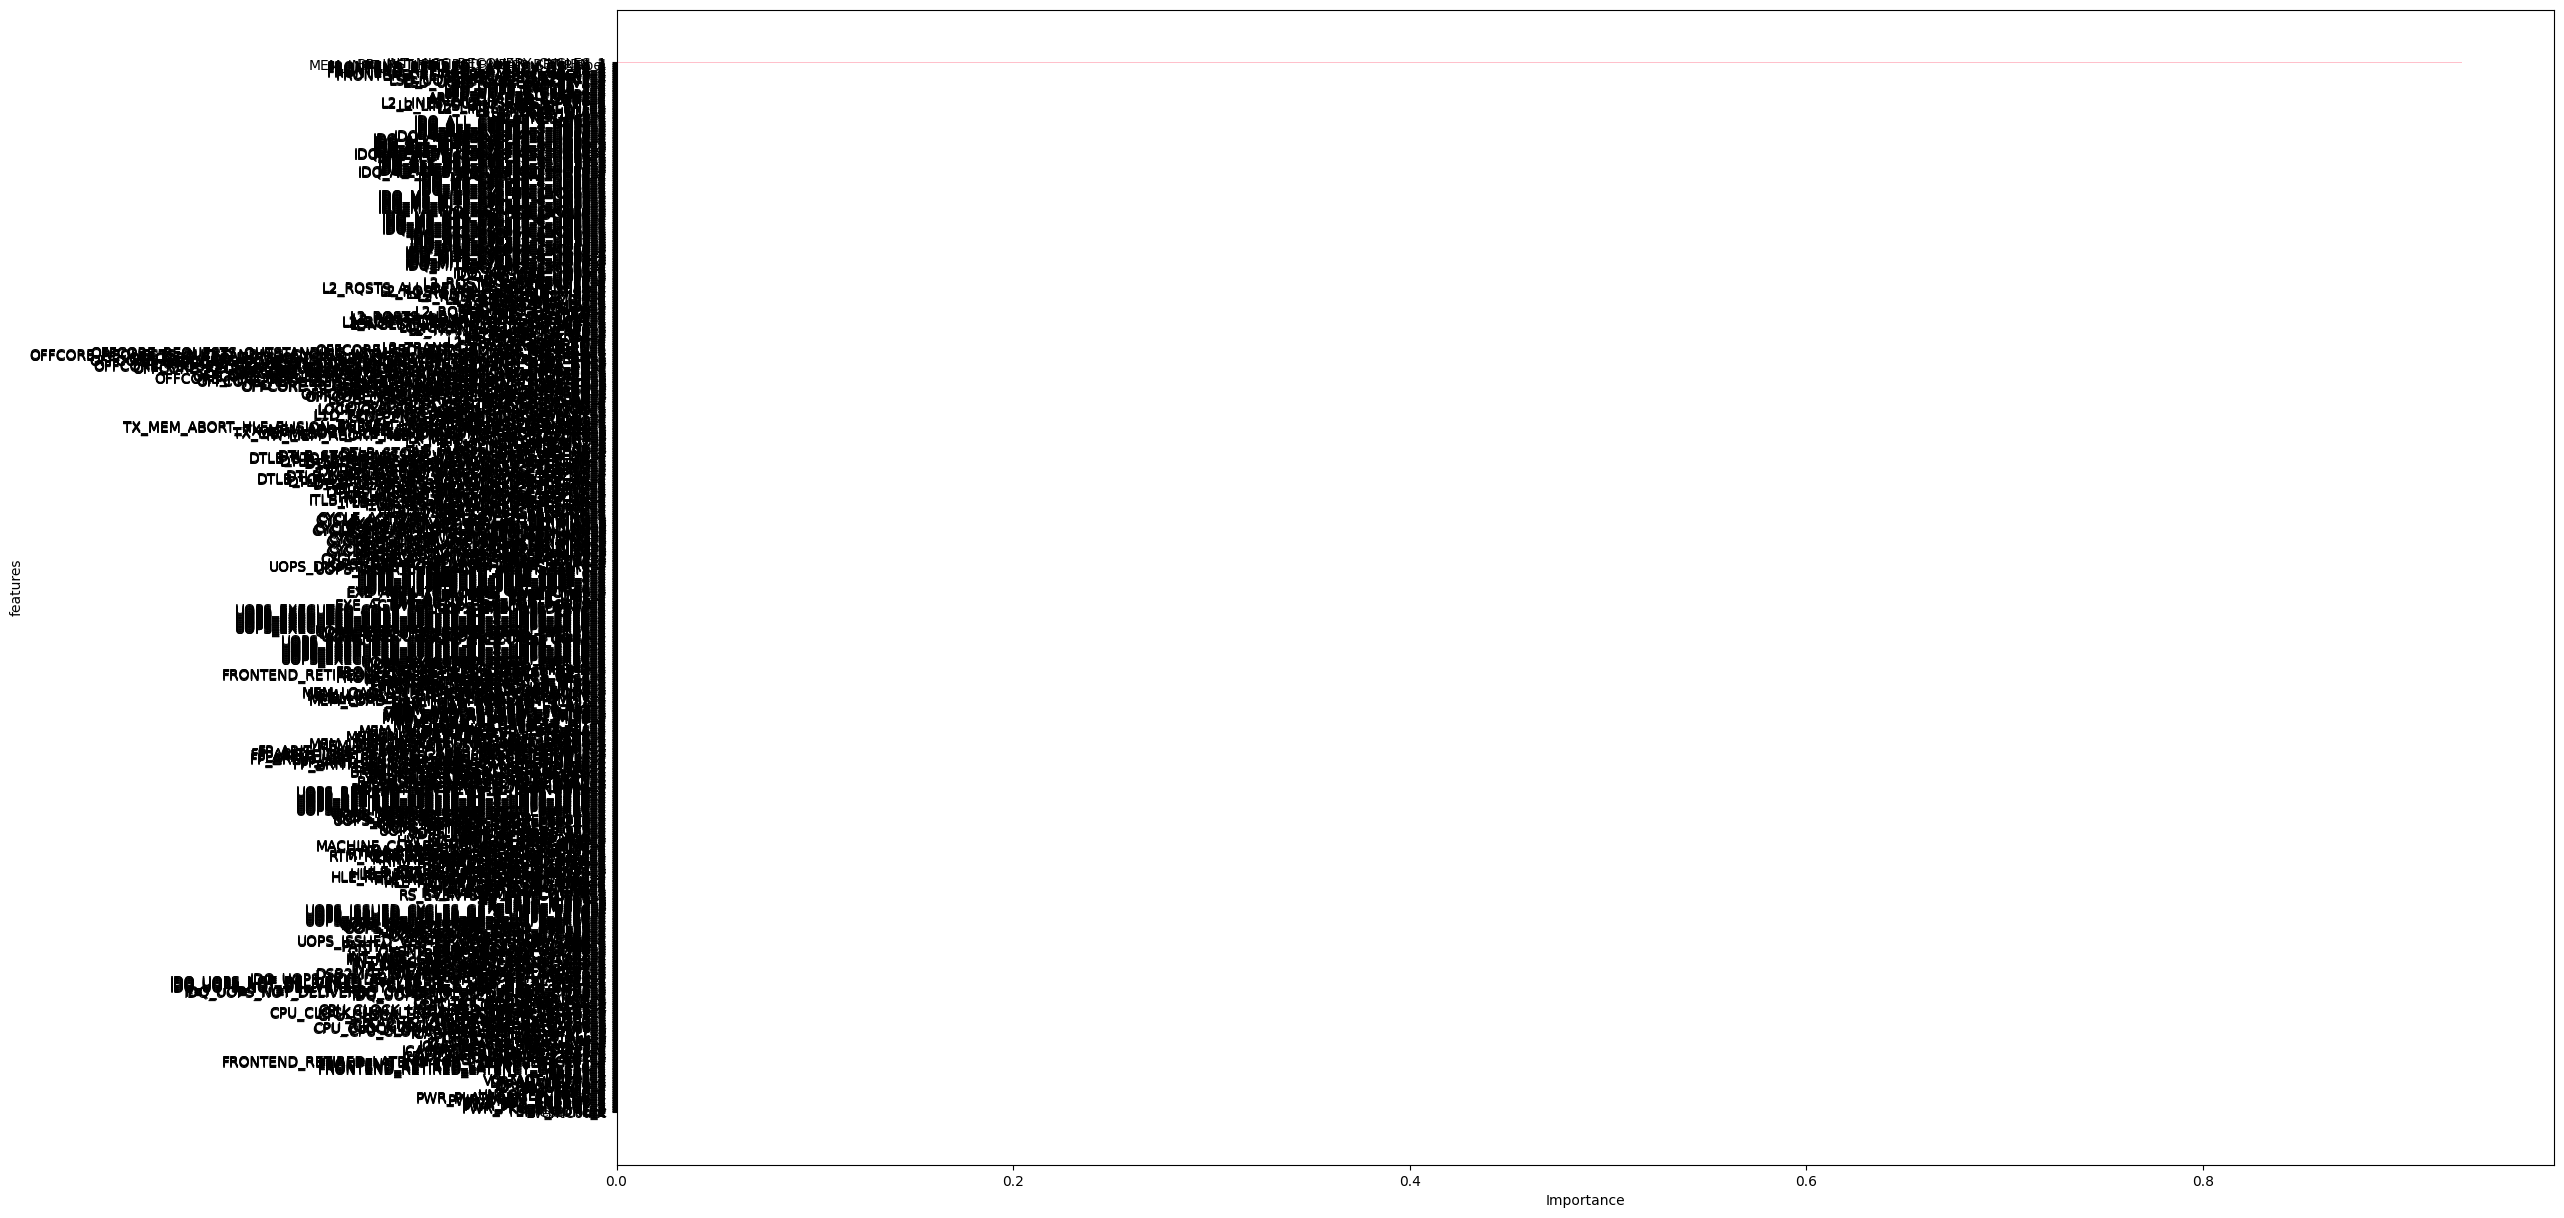

In [171]:
feature = []
imp = []
c = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink', 'purple']*5

for i,col in enumerate(df_all.drop('Unnamed: 0',axis=1)):
    feature.append(col)
    imp.append(clf.feature_importances_[i])

keydict = dict(zip(feature, imp))
feature.sort(key=keydict.get)
imp.sort()

fig = plt.figure(figsize = (25, 15))
plt.barh(feature, imp, color = c)
 
plt.ylabel("features")
plt.xlabel("Importance")
plt.show()

In [118]:
clf = RandomForestClassifier()

# Fit the model
clf.fit(x, y)
feature_importances = clf.feature_importances_


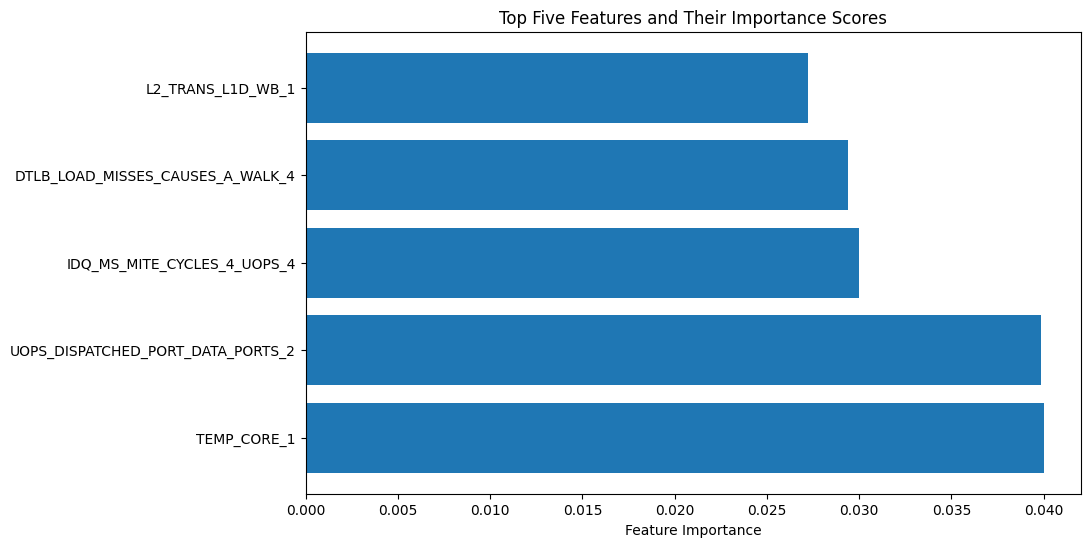

In [119]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create a Random Forest Classifier instance
clf = RandomForestClassifier()

# Fit the model
clf.fit(x, y)

# Get feature importances
feature_importances = clf.feature_importances_
feature_names = list(df_all.columns)  # Replace with your feature names

# Combine feature names and importances
features_with_importance = list(zip(feature_names, feature_importances))

# Sort features by importance
features_with_importance.sort(key=lambda x: x[1], reverse=True)

# Select top five features
top_features = features_with_importance[:5]

# Extract top feature names and scores
top_feature_names = [feat[0] for feat in top_features]
top_feature_scores = [feat[1] for feat in top_features]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(top_feature_names)), top_feature_scores, align='center')
plt.yticks(np.arange(len(top_feature_names)), top_feature_names)
plt.xlabel('Feature Importance')
plt.title('Top Five Features and Their Importance Scores')
plt.show()


In [174]:
lp = list(df_all.columns)


In [175]:
lp

['Unnamed: 0',
 'EventCount',
 'CpuCount',
 'TEMP_CORE_1',
 'TEMP_CORE_2',
 'TEMP_CORE_3',
 'TEMP_CORE_4',
 'PWR_PKG_ENERGY_1',
 'PWR_PKG_ENERGY_2',
 'PWR_PKG_ENERGY_3',
 'PWR_PKG_ENERGY_4',
 'PWR_PP0_ENERGY_1',
 'PWR_PP0_ENERGY_2',
 'PWR_PP0_ENERGY_3',
 'PWR_PP0_ENERGY_4',
 'PWR_PP1_ENERGY_1',
 'PWR_PP1_ENERGY_2',
 'PWR_PP1_ENERGY_3',
 'PWR_PP1_ENERGY_4',
 'PWR_DRAM_ENERGY_1',
 'PWR_DRAM_ENERGY_2',
 'PWR_DRAM_ENERGY_3',
 'PWR_DRAM_ENERGY_4',
 'PWR_PLATFORM_ENERGY_1',
 'PWR_PLATFORM_ENERGY_2',
 'PWR_PLATFORM_ENERGY_3',
 'PWR_PLATFORM_ENERGY_4',
 'UNCORE_CLOCK_1',
 'UNCORE_CLOCK_2',
 'UNCORE_CLOCK_3',
 'UNCORE_CLOCK_4',
 'PP0_TEMP_1',
 'PP0_TEMP_2',
 'PP0_TEMP_3',
 'PP0_TEMP_4',
 'PP1_TEMP_1',
 'PP1_TEMP_2',
 'PP1_TEMP_3',
 'PP1_TEMP_4',
 'IO_REQUESTS_1',
 'IO_REQUESTS_2',
 'IO_REQUESTS_3',
 'IO_REQUESTS_4',
 'DRAM_READS_1',
 'DRAM_READS_2',
 'DRAM_READS_3',
 'DRAM_READS_4',
 'DRAM_WRITES_1',
 'DRAM_WRITES_2',
 'DRAM_WRITES_3',
 'DRAM_WRITES_4',
 'VOLTAGE_CORE_1',
 'VOLTAGE_CORE_2',
 'V